# Library setup

In [1]:
from ESRF_ID10_SURF.GID import GID
from ESRF_ID10_SURF.XRR import XRR, rebin
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FileDir = '/mnt/data/ls3582/id10-surf/20251120/RAW_DATA/DPPC_0PS/DPPC_0PS_0002/'
FileName = 'DPPC_0PS_0002.h5'

file = FileDir+FileName

SavingDir = FileDir.replace('RAW_DATA', 'PROCESSED_DATA')  ### optional. If this argument is not given to the class, data will be saved in the folder where the script runs

zgH_ScanN_list = [21]   ### optional z-scan for normalization of intensity
refl_ScanN_list = [22,23] ### actual XRR scans


gid_ScanN_list = [25]

(PX0, PY0) = (401, 300)
(dPX, dPY) = (8, 5)
bckg_gap = 3
monitor_name = 'ionch2'

# X-ray reflectivity

Loaded scan #22
Loaded scan #23
Number of points in the scan    124
Loaded scan #21
Number of points in the scan     41
Correcting transmission using double points.
Flux set to 6.4819e+11
I0 replaced.
Loaded scan #22
Loaded scan #23
Number of points in the scan    124
Reloaded and reprocessed data.
Correcting transmission using double points.
Footprint correction completed with beam size = 19 microns and sample size = 17 cm
Reflectivity is fully corrected.


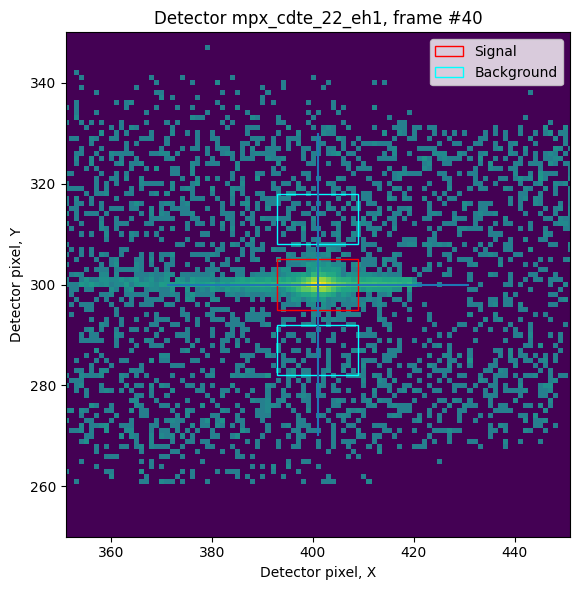

In [3]:
refl = XRR(file, refl_ScanN_list, alpha_i_name='mu', PX0=PX0, PY0=PY0, dPX=dPX, dPY=dPY, bckg_gap=bckg_gap, monitor_name=monitor_name ,saving_dir=SavingDir)
zgH = XRR(file, zgH_ScanN_list, alpha_i_name='zgH', PX0=PX0, PY0=PY0, dPX=dPX, dPY=dPY, bckg_gap=bckg_gap, monitor_name=monitor_name)


### Plot one of the detector images for diagnostic, i.e. reflected beam is out of the signal box, parasitic scattering in the background, etc.
refl.show_detector_image(40)


### Apply all necessary correction in automatic way, sample size im cm and beam size in microns are required for the footprint correction
### z_scan with the same filter as first part of the reflectivity is optional, provides I0 normalization
refl.apply_auto_corrections(sample_size=17, beam_size=19, z_scan=zgH)

## Plot and save reflectivity curve

Plot saved to /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//DPPC_0PS_XRR_scan_[22 23]_Pi_35_log.png.
Reflectivity saved to: /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//DPPC_0PS_XRR_scan_[22 23]_Pi_35.dat
Reflectivity saved to: /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002/DPPC_0PS_XRR_scan_[22 23]_Pi_35.ort


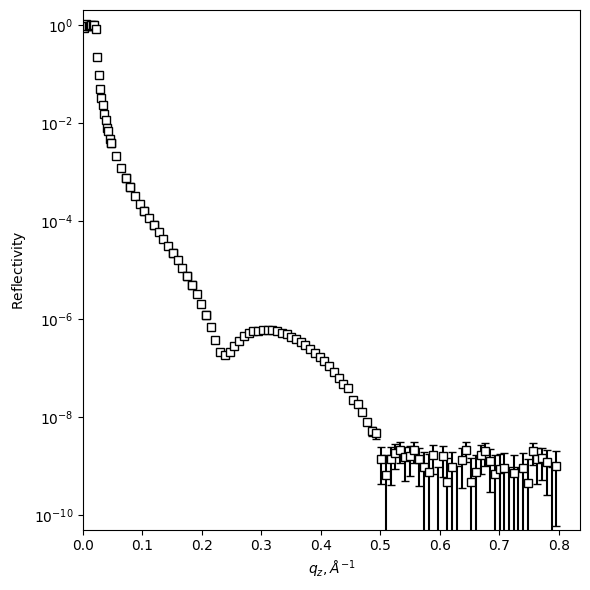

In [4]:
# Plot reflectivity on a new Figure
refl.plot_reflectivity(save=True, fmt='s', markersize=6, color='k', markerfacecolor='w', capsize=3)

# Same, but multiplied by q_z^4
#refl.plot_reflectivity_qz4()

### Save as 3-column .dat file
refl.save_reflectivity()
### Save metadata-rich ORSO-compliant file
refl.save_reflectivity(format='orso', owner='Harvard', creator='John Doe')

### Remap scanning XRR experiment into q-space to explore diffuse scattering

Starting q-space mapping.
2D map calculated. Processing time 0.476 sec
/home/egor/PycharmProjects/ESRF_ID10_SURF/src/ESRF_ID10_SURF/XRR/XRR.py:530: RuntimeWarning: divide by zero encountered in log10
  ax0.pcolormesh(self.Qx_map, self.Qz_map, np.log10(self.Smap2D), cmap='viridis', vmin=2, vmax=10,
/home/egor/PycharmProjects/ESRF_ID10_SURF/src/ESRF_ID10_SURF/XRR/XRR.py:530: RuntimeWarning: invalid value encountered in log10
  ax0.pcolormesh(self.Qx_map, self.Qz_map, np.log10(self.Smap2D), cmap='viridis', vmin=2, vmax=10,


(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='$q_x, \\AA^{-1}$', ylabel='$q_z, \\AA^{-1}$'>)

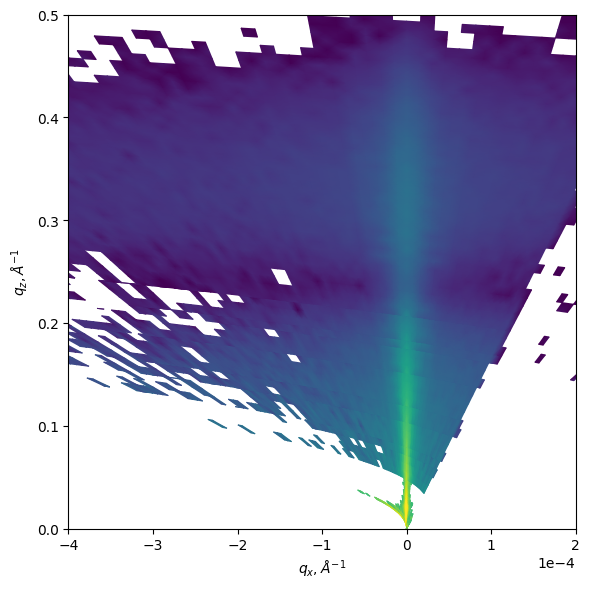

In [5]:
refl.produce_Qmap(SDD=820)
refl.plot_Qmap()

# Grazing Incidence Diffraction

## Calibration of Mythen detector

Calibrating Mythen from scan #59


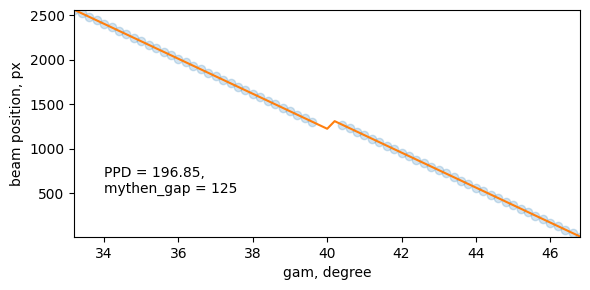

In [6]:
calibration_filename = '/mnt/data/ls3582/id10-surf/20251120/RAW_DATA/eh1_exp_2025_11_17/eh1_exp_2025_11_17_0001/eh1_exp_2025_11_17_0001.h5'
PPD, mythen_gap = GID.calibrate_mythen(filename=calibration_filename, scanN=59, plot=True)

## Processing data for quick asessment

Start loading data.
Loading scan #25
Loaded scan #25
Loading completed. Reading time 0.003 sec
Start processing 2D data.
Processing completed. Processing time 0.001 sec 


Saving standard GID plot.


/home/egor/PycharmProjects/ESRF_ID10_SURF/src/ESRF_ID10_SURF/GID/GID.py:333: RuntimeWarning: divide by zero encountered in log10
  im = ax0.imshow(np.log10(np.rot90(self.data_gap)), aspect='equal', vmin=_vmin, vmax=_vmax,


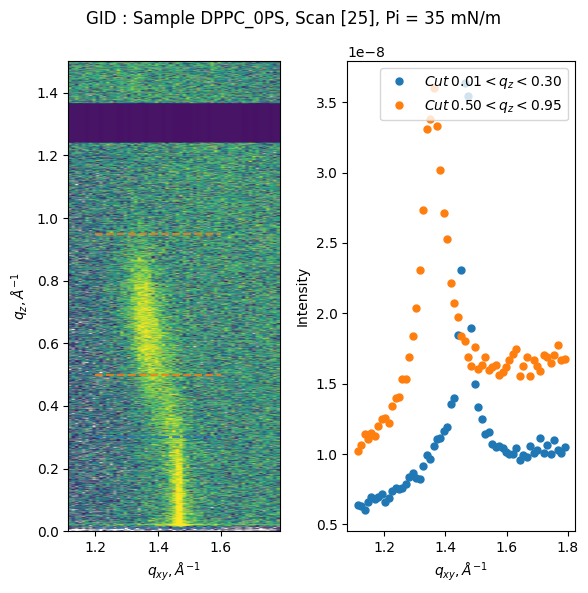

In [7]:
gid = GID(file, gid_ScanN_list, PX0=50, PPD=PPD, mythen_gap=mythen_gap, alpha_i_name='mu', I0=2e12, saving_dir=SavingDir)
fig, ax = gid.plot_quick_analysis(save=True)

## Making q-space cuts

/home/egor/PycharmProjects/ESRF_ID10_SURF/src/ESRF_ID10_SURF/GID/GID.py:393: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, 'o', markersize=5, label=label, **kwargs)


GID cut saved as: /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[25]_qxy_cut_0_0.4_A.dat
GID cut saved as: /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[25]_qxy_cut_0.5_1_A.dat
GID cut saved as: /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[25]_qz_cut_1.4_1.5_A.dat
GID cut saved as: /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[25]_qz_cut_1.25_1.4_A.dat


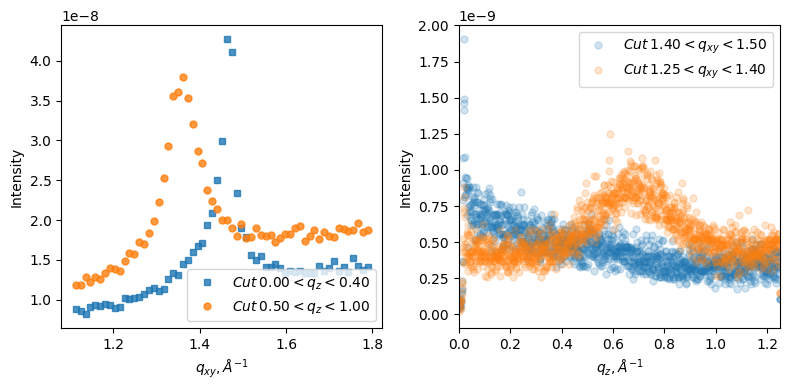

In [8]:
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(8,4), layout='tight')
gid.plot_qxy_cut(0, 0.4, ax=ax0, marker='s', alpha=0.8)            ## plot cut
gid.plot_qxy_cut(0.5, 1, ax=ax0, alpha=0.8)
ax0.legend(loc = 'lower right')
gid.save_qxy_cut(0, 0.4)                   ## save the same cut as txt file
gid.save_qxy_cut(0.5, 1)

gid.plot_qz_cut(1.4, 1.5, ax=ax1, alpha=0.2)
gid.plot_qz_cut(1.25, 1.4, ax=ax1, alpha=0.2)
ax1.set_xlim(0, 1.25)

gid.save_qz_cut(1.4, 1.5)
gid.save_qz_cut(1.25, 1.4)


### Plot only 2D graph to be able to modifiy image


(0.0, 1.2)

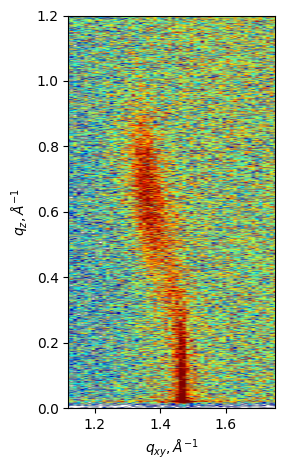

In [9]:
fig, ax = plt.subplots(layout='tight')
gid.plot_2D_image(ax=ax, cmap='jet')   ### this function takes kwargs for imshow
ax.set_xlim((1.12,1.75))
ax.set_ylim(0, 1.2)


### An example of rebinning data to smooth/reduce number of points

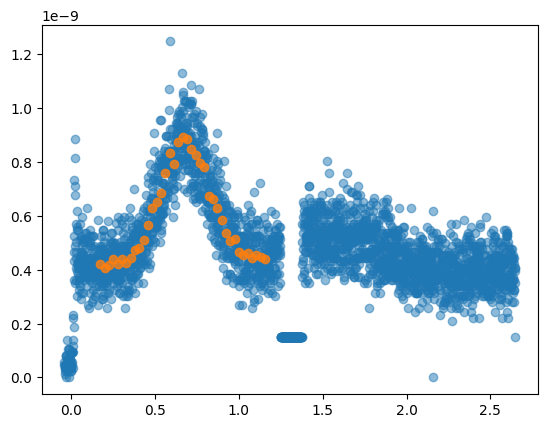

In [10]:
qz, qz_cut  = gid.get_qz_cut(1.25, 1.4)
new_qz, new_qz_cut, new_qz_e = rebin(qz[200:1200], qz_cut[200:1200],np.ones(len(qz[200:1200])), number_of_bins=40)
plt.plot(qz, qz_cut, 'o', alpha=0.5)
plt.plot(new_qz, new_qz_cut, 'o', alpha=0.8)

## Example of quick data fitting

### It is possible to modify peak shape and background
### Peak shapes:
+ Gaussian
+ Lorentzian
+ Voigt
+ Pseudo-voigt
### Backgrounds:
+ Linear
+ Constant

Fitting gaussian profile...
Graph saved to /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qz_fit_result_pi_35_DPPC_0PS.png
Fit parameters saved to /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qz_fit_result_pi_35_DPPC_0PS.txt


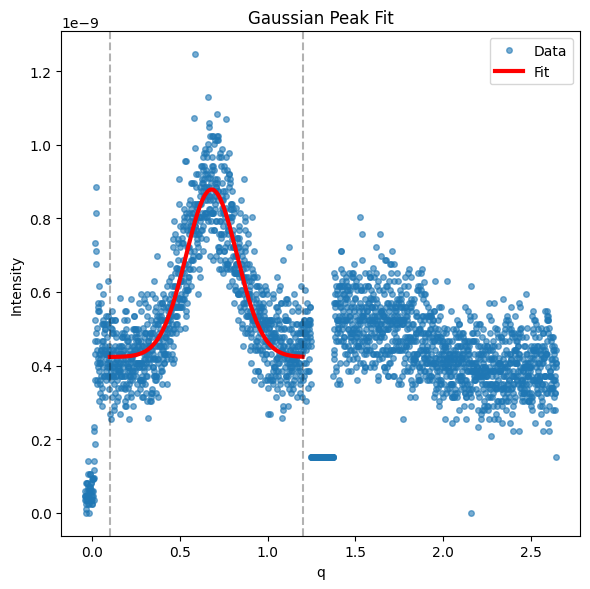

In [11]:
gid.analyze_peak(*gid.get_qz_cut(1.25, 1.4), limits=(0.1, 1.2), model='gaussian', background='constant', filename_prefix=f'qz_fit_result_pi_{gid.Pi}', save=True)

Fitting voigt profile...
Graph saved to /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qxy_fit_result_pi_35_DPPC_0PS.png
Fit parameters saved to /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qxy_fit_result_pi_35_DPPC_0PS.txt


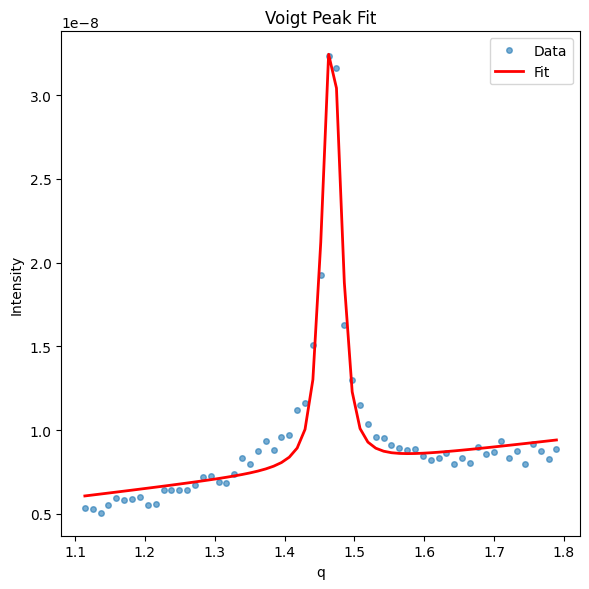

In [12]:
gid.analyze_peak(*gid.get_qxy_cut(0, 0.25), filename_prefix=f'qxy_fit_result_pi_{gid.Pi}',model='voigt', save=True)

## Saving a 2D image to h5 file to be explored with pyMCA and to .dat file

In [13]:
gid.save_image_h5()   ## This is a preferred format

Scan already processed and saved to h5: Unable to synchronously create group (name already exists)


In [14]:
gid.save_image_dat()   ## This is not recommended as the resulting file is big and difficult to work with

2D image saved to /mnt/data/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[25]_2D.dat
